In [1]:
# Cell to demo what the above code does
# Add more code cells to keep a record of the demos
# Monte Hall Simulation Code -- not the only way to code this, but it's what Prof. Schwartz came up with...

import numpy as np
all_door_options = (1,2,3)  # tuple
my_door_choice = 1  # 1,2,3
i_won = 0
reps = 100000
for i in range(reps):
    secret_winning_door = np.random.choice(all_door_options)
    all_door_options_list = list(all_door_options)
    # take the secret_winning_door, so we don't show it as a "goat" losing door
    all_door_options_list.remove(secret_winning_door)
    try:
        # if my_door_choice was secret_winning_door then it's already removed
        all_door_options_list.remove(my_door_choice)
    except:
        pass
    # show a "goat" losing door and remove it
    goat_door_reveal = np.random.choice(all_door_options_list)
    all_door_options_list.remove(goat_door_reveal)

    # put the secret_winning_door back in if it wasn't our choice
    # we previously removed it, so it would be shown as a  "goat" losing door
    if secret_winning_door != my_door_choice:
        all_door_options_list.append(secret_winning_door)
    # if secret_winning_door was our choice then all that's left in the list is a "goat" losing door
    # if secret_winning_door wasn't our choice then it's all that will be left in the list

    # swap strategy
    my_door_choice = all_door_options_list[0]

    if my_door_choice == secret_winning_door:
        i_won += 1

i_won/reps

0.66665

The simulation runs the Monty Hall problem 100,000 times, where the player always switches their initial choice. The code calculates how often the player wins after switching, which should be around 66.67% since switching doors gives a higher probability of winning.







Pre-Lecture 2

In [2]:
#Imporved code _ gpt

import numpy as np

all_door_options = (1, 2, 3)  # tuple of doors
reps = 100000  # number of simulations
i_won = 0  # win counter

for i in range(reps):
    # Randomly assign the winning door
    winning_door = np.random.choice(all_door_options)
    
    # The player randomly picks a door
    player_choice = np.random.choice(all_door_options)
    
    # Host reveals a losing (goat) door that is not the player's choice or the winning door
    remaining_doors = [door for door in all_door_options if door != player_choice and door != winning_door]
    revealed_goat_door = np.random.choice(remaining_doors)
    
    # Player switches to the other remaining door
    remaining_doors = [door for door in all_door_options if door != player_choice and door != revealed_goat_door]
    player_choice = remaining_doors[0]
    
    # Check if the player's new choice is the winning door
    if player_choice == winning_door:
        i_won += 1

# Calculate the win percentage when switching
win_percentage = i_won / reps
win_percentage


0.66646



| Aspect                      | Original Code                                         | Improved Code                                      

| **Door Management**       | Manually removes and re-adds doors                    | Uses list filtering to determine remaining doors           
| **Error Handling**        | Uses `try-except` for special cases                   | No need for error handling; relies on list comprehensions    
| **Switching Strategy**    | Adds the winning door back if necessary               | Directly switches to the remaining door without extra logic  
| **Simplicity**            | More steps and list manipulations                     | Linear and streamlined flow                                 
| **Readability**           | Harder to follow due to state changes and conditions  | Easier to follow with clear, isolated steps                 
| **Explainability**        | Requires more detailed explanation for each step      | Clear and direct steps with minimal state changes           


Pre-Lecture 3 

In [3]:
import numpy as np  # Importing numpy for random selection

# Define the three door options
all_door_options = (1, 2, 3)  # tuple of doors 1, 2, and 3

reps = 100000  # Number of simulations (100,000 repetitions)
i_won = 0  # Counter to keep track of how many times the player wins by switching doors

# Loop over the number of simulations
for i in range(reps):
    
    # Randomly assign the winning door (the door with the car behind it)
    winning_door = np.random.choice(all_door_options)
    
    # The player randomly picks a door (could be the winning one or a losing one)
    player_choice = np.random.choice(all_door_options)
    
    # The host reveals a goat door (a losing door) that is neither the player's choice nor the winning door
    remaining_doors = [door for door in all_door_options if door != player_choice and door != winning_door]
    
    # Randomly select a goat door from the remaining doors
    revealed_goat_door = np.random.choice(remaining_doors)
    
    # Player now switches to the remaining unopened door (not the initially chosen one and not the revealed goat door)
    remaining_doors = [door for door in all_door_options if door != player_choice and door != revealed_goat_door]
    
    # Player switches to the only remaining door after the host reveals a goat
    player_choice = remaining_doors[0]
    
    # Check if the player's new choice (after switching) is the winning door
    if player_choice == winning_door:
        i_won += 1  # Increment the win counter if the player chose the winning door

# Calculate the probability of winning when switching doors
win_percentage = i_won / reps

# Display the win percentage after all simulations
win_percentage


0.66471



1. **Original Monte Hall Code Explanation**: 
   - We went through each part of your original Monte Hall simulation code, explaining the logic and purpose behind each step, such as random door selection, revealing a goat door, switching strategy, and calculating the win percentage.

2. **Streamlined Code**: 
   - I provided an improved, streamlined version of the simulation code. This version uses list comprehensions and avoids manual removal and re-addition of doors. It simplifies the process of filtering doors and enhances readability by eliminating unnecessary complexity like the `try-except` block.

3. **Differences Between Original and Improved Code**:
   - We compared the original and improved codes in terms of readability and explainability. The improved version is more linear, easier to follow, and less error-prone, making it clearer for explanation, especially for beginners.

4. **Commented Version of the Improved Code**:
   - I added detailed comments to the improved version of the code to explain the purpose of each line, making it easier to understand step by step, from random door selection to switching strategy and win calculation.

https://chatgpt.com/share/66eb3997-2388-8002-9401-e7f52150f320

Pre-Lecture 4

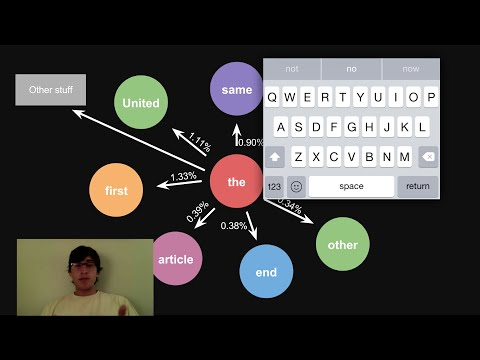

In [4]:
# Markov Chains and Text Generation
from IPython.display import YouTubeVideo
YouTubeVideo('56mGTszb_iM', width = 550)

How Markovian code works_gpt 

This code is implementing a simple **Markovian Chatbot** by analyzing the sequence of words in a dataset to predict the next word based on the previous one. It operates using the following logic:

### Step-by-Step Explanation

1. **Data Structures**:
   - `word_used`: A dictionary that tracks how many times each word appears in the dataset. It's used to count the occurrences of each word.
   - `next_word`: A dictionary of dictionaries that keeps track of the probability of one word following another. The outer dictionary's keys are words, and each value is another dictionary that maps potential next words to their frequency.

2. **Main Loop**:
   - The loop `for i, word in enumerate(words[:-1]):` iterates over the list `words`, excluding the last word (because the loop is always looking at pairs of words, and there is no word after the last word).
   
3. **Tracking Word Occurrences**:
   - For each word in the loop (`word`), the code checks if it has been encountered before in `word_used`:
     - If the word is already in `word_used`, it increments its count (`word_used[word] += 1`).
     - If the word is not in `word_used`, it initializes its count to 1 and sets up an empty dictionary for `next_word[word]`.
   
4. **Tracking the Next Word**:
   - After the code processes the current word, it checks what the next word in the list (`words[i+1]`) is.
   - In `next_word`, it updates the dictionary for the current word (`word`) to record how many times each possible "next word" follows it.
     - If the next word has already been recorded as a possible next word for the current word, it increments its count.
     - If it hasn't been recorded yet, it initializes the count to 1.

### How it Works:

- **Markov Chain Principle**: This code uses the Markov chain concept, where the next state (or word) depends only on the current state (or word), not on the full sequence before it. In this case, the chatbot learns which words are most likely to follow a given word by counting the occurrences of word pairs.

- **Training**: As the code processes the list of words, it builds up a statistical model of word transitions. For example, if the dataset is a text of sentences, the code will know how frequently certain words follow others, like "hello" might frequently be followed by "world."

- **Chatbot Generation**: Once the model is built, the chatbot can use it to generate text by picking a starting word and using the `next_word` dictionary to select the next word probabilistically based on past data.

### Example:

If the input list of words is `["I", "am", "a", "chatbot", "I", "am", "learning"]`, the resulting structures would look like:

- `word_used = {"I": 2, "am": 2, "a": 1, "chatbot": 1, "learning": 1}`
- `next_word = {"I": {"am": 2}, "am": {"a": 1, "learning": 1}, "a": {"chatbot": 1}, "chatbot": {"I": 1}}`

This information can then be used to predict future word sequences.

Post-Lecture 5 


1,2)



### **Markovian Chatbot Extension #1**:

```python
word_used2 = defaultdict(int)
next_word2 = defaultdict(lambda: defaultdict(int))

for i,word in enumerate(words[:-2]):
    word_used2[word+' '+words[i+1]] += 1
    next_word2[word+' '+words[i+1]][words[i+2]] += 1
```

#### **Explanation**:
- This extension adds an extra level of sophistication by using **pairs of consecutive words** as the key in both the `word_used2` and `next_word2` dictionaries. 
- Instead of predicting the next word based on a single word (as in the original version), this extension predicts the next word based on a pair of words.
  
**Key Points**:
1. **`word_used2[word+' '+words[i+1]]`**:
   - Tracks how many times a pair of words appears in the dataset. For example, if `words[i] = "I"` and `words[i+1] = "am"`, it will increment the count of `"I am"` in `word_used2`.
   
2. **`next_word2[word+' '+words[i+1]][words[i+2]]`**:
   - Tracks how often a word (`words[i+2]`) follows the pair of words. So, if `words[i+2] = "a"`, it increments the count of the pair `"I am"` followed by `"a"`.
   
**Behavior**:
- By working with word pairs, this extension makes the prediction model more nuanced. Instead of considering only one word at a time, it now has context from two words, which can improve sentence coherence.

#### **Example**:
If the dataset consists of `["I", "am", "a", "chatbot", "I", "am", "learning"]`, the structures might look like:
- `word_used2 = {"I am": 2, "am a": 1, "a chatbot": 1}`
- `next_word2 = {"I am": {"a": 1, "learning": 1}, "am a": {"chatbot": 1}, "a chatbot": {"I": 1}}`

---

### **Markovian Chatbot Extension #2**:

```python
from collections import Counter, defaultdict

characters = Counter("\n"+ avatar.character.str.upper().str.replace(' ','.')+":")
nested_dict = lambda: defaultdict(nested_dict)
word_used2C = nested_dict()
next_word2C = nested_dict()

for i,word in enumerate(words[:-2]):
    if word in characters:
        character = word
        
    if character not in word_used2C:
        word_used2C[character] = dict()
    if word+' '+words[i+1] not in word_used2C[character]:
        word_used2C[character][word+' '+words[i+1]] = 0
    word_used2C[character][word+' '+words[i+1]] += 1
    
    if character not in next_word2C:
        next_word2C[character] = dict()
    if word+' '+words[i+1] not in next_word2C[character]:
        next_word2C[character][word+' '+words[i+1]] = dict()
    if words[i+2] not in next_word2C[character][word+' '+words[i+1]]:
        next_word2C[character][word+' '+words[i+1]][words[i+2]] = 0
    next_word2C[character][word+' '+words[i+1]][words[i+2]] += 1
```

#### **Explanation**:
- This extension is more advanced as it associates the Markovian predictions with **specific characters** from a dataset.
- The dataset contains a column `character`, and the code transforms the text in this column to uppercase and replaces spaces with dots to create a unique string format (e.g., "CHARACTER NAME:" becomes `"CHARACTER.NAME:"`).
- It then builds separate Markov chains (word transitions) **for each character**.

**Key Points**:
1. **`characters = Counter("\n"+ avatar.character.str.upper().str.replace(' ','.')+":")`**:
   - This line generates a count of each character in the dataset by transforming the text to uppercase and replacing spaces with dots (likely to standardize the format for easier processing).

2. **`nested_dict = lambda: defaultdict(nested_dict)`**:
   - `nested_dict` creates a recursive dictionary structure. This allows for deeply nested dictionaries where you can store multiple layers of word associations for each character.

3. **Tracking Words for Each Character**:
   - For each word, the code checks if it is a character's name (from the `characters` dataset). If it is, it associates the word pair and its subsequent word with that character.
   - It builds the `word_used2C` and `next_word2C` dictionaries **for each character** separately, allowing the chatbot to make predictions based on character-specific word usage.

#### **Behavior**:
- This extension allows the chatbot to generate context-aware responses for specific characters based on their typical word usage patterns.

#### **Example**:
If `avatar.character` has a list of names like `["John Doe", "Jane Doe"]`, it will standardize these names as `"JOHN.DOE:"` and `"JANE.DOE:"`. Then, for each of these characters, it tracks their word pairs and predicts future words based on their individual speaking patterns.

---

### **Summary of the Extensions**:

- **Extension #1**: 
  - Focuses on word pairs rather than single words to improve prediction accuracy by adding more context (two words instead of one).
  
- **Extension #2**: 
  - Associates word prediction with specific characters, making the chatbot capable of generating responses that are character-specific based on how those characters speak.

Both extensions enhance the original Markovian Chatbot by increasing context, with one focusing on word-pair sequences and the other associating predictions with distinct characters.

3 )

In [6]:
#extension code gpt provided

import random

def generate_sentence(start_word, max_length=10):
    sentence = [start_word]
    current_word = start_word

    for _ in range(max_length):
        if current_word not in next_word:
            break  # End if there are no known follow-up words
        
        next_words = list(next_word[current_word].keys())
        probabilities = [next_word[current_word][w] / word_used[current_word] for w in next_words]
        
        current_word = random.choices(next_words, weights=probabilities)[0]
        sentence.append(current_word)
    
    return ' '.join(sentence)

# Example usage:
start = 'the'  # You can choose any start word
print(generate_sentence(start))


NameError: name 'next_word' is not defined

In [7]:
# Define next_word and word_used globally
word_used = dict()
next_word = dict()

# Populate next_word and word_used as before
for i, word in enumerate(words[:-1]):
    if word in word_used:
        word_used[word] += 1
    else:
        word_used[word] = 1
        next_word[word] = {}

    if words[i + 1] in next_word[word]:
        next_word[word][words[i + 1]] += 1
    else:
        next_word[word][words[i + 1]] = 1

# Define generate_sentence using the global next_word and word_used
def generate_sentence(start_word, max_length=10):
    sentence = [start_word]
    current_word = start_word

    for _ in range(max_length):
        if current_word not in next_word:
            break  # End if there are no known follow-up words

        next_words = list(next_word[current_word].keys())
        probabilities = [next_word[current_word][w] / word_used[current_word] for w in next_words]

        current_word = random.choices(next_words, weights=probabilities)[0]
        sentence.append(current_word)

    return ' '.join(sentence)

# Example usage
start = 'the'  # Ensure that 'the' exists in the next_word dictionary
print(generate_sentence(start))


NameError: name 'words' is not defined

In [8]:
# Example of defining 'words' from a text string
text = "This is an example text for building a Markov chain chatbot. It will predict the next word based on this text."
words = text.split()  # Split the text into words

# Define next_word and word_used globally
word_used = dict()
next_word = dict()

# Populate next_word and word_used as before
for i, word in enumerate(words[:-1]):
    if word in word_used:
        word_used[word] += 1
    else:
        word_used[word] = 1
        next_word[word] = {}

    if words[i + 1] in next_word[word]:
        next_word[word][words[i + 1]] += 1
    else:
        next_word[word][words[i + 1]] = 1

# Define generate_sentence using the global next_word and word_used
def generate_sentence(start_word, max_length=10):
    sentence = [start_word]
    current_word = start_word

    for _ in range(max_length):
        if current_word not in next_word:
            break  # End if there are no known follow-up words

        next_words = list(next_word[current_word].keys())
        probabilities = [next_word[current_word][w] / word_used[current_word] for w in next_words]

        current_word = random.choices(next_words, weights=probabilities)[0]
        sentence.append(current_word)

    return ' '.join(sentence)

# Example usage
start = 'This'  # Ensure that the start word exists in the next_word dictionary
print(generate_sentence(start))


This is an example text for building a Markov chain chatbot.


In [9]:
# Markovian Chatbot


# from collections import defaultdict
word_used = dict() # defaultdict(int)
next_word = dict() # defaultdict(lambda: defaultdict(int))
for i,word in enumerate(words[:-1]):


    if word in word_used:
        word_used[word] += 1
    else:
        word_used[word] = 1
        next_word[word] = {}


    if words[i+1] in next_word[word]:
        next_word[word][words[i+1]] += 1
    else:

        

SyntaxError: incomplete input (3820480735.py, line 21)

https://chatgpt.com/share/66eb448e-4dc8-8002-8d3d-688eaa1d4864

6 )

**Report on Interacting with ChatBots**

**1. Monte Hall Problem:**
ChatBots did a great job explaining the Monte Hall problem quickly and clearly. They provided various perspectives and examples that made the concept easier to grasp.

**2. "Markovian ChatBot" Code:**
For the "Markovian ChatBot" code, the ChatBot was very helpful. It broke down the code into smaller parts and explained each one, making it easier to understand how everything fit together.

**3. Frustrations:**
There were moments when the ChatBot's responses were either too technical or too general, which meant I had to ask follow-up questions to get the details I needed. This sometimes felt a bit frustrating.

**4. Overall Assessment:**
ChatBots are great for quick help with learning and coding problems. They provide fast, varied explanations and are especially useful for getting started. However, they can struggle with very specific issues, so it's a good idea to use them alongside other resources.

7 )

My view on ChatBots has changed since using them for coding and data science. I now find them really useful for breaking down complex topics and providing quick answers. However, they sometimes give vague or overly technical responses, so I use them alongside other resources for a fuller understanding. Overall, they're a handy tool but not a complete solution on their own.

8 )

8.1 

Question : What is the relevance of learning and adaptability, communication, coding, and statistics and data analysis as skills in the modern world, especially with respect to career opportunities (particularly in the context of the data science industry)

Chat bot: What is the relevance of learning and adaptability, communication, coding, and statistics and data analysis as skills in the modern world, especially with respect to career opportunities (particularly in the context of the data science industry)

8.2 

Question : Objectively, do you think anyone could be a statistician or data scientist without coding or doing data analysis

CHatbot : Objectively, it would be very challenging to be a statistician or data scientist without coding or data analysis skills. Here’s why:

1. **Coding**:
   - **Essential for Data Handling**: Coding is crucial for handling and processing large datasets. It enables you to write scripts for data manipulation, automation of repetitive tasks, and building data pipelines.
   - **Tool for Analysis**: Coding allows you to implement statistical models and machine learning algorithms. Without coding, it would be difficult to perform complex analyses or develop custom solutions.
   - **Integration and Automation**: Coding skills are needed to integrate data with other systems, automate workflows, and ensure that your analyses are scalable and reproducible.

2. **Data Analysis**:
   - **Core Function**: Data analysis is the heart of what statisticians and data scientists do. It involves interpreting data, identifying patterns, and deriving insights that inform decision-making.
   - **Statistical Methods**: Understanding statistical methods and techniques is essential for performing rigorous analyses, validating results, and making evidence-based recommendations.
   - **Tool Proficiency**: Even with statistical software or tools, a fundamental grasp of data analysis principles is necessary to use these tools effectively and interpret their outputs correctly.

While it’s theoretically possible to have a role in data science or statistics without coding or data analysis if you focus on areas like project management or client liaison, the core responsibilities of a statistician or data scientist inherently involve these skills. Coding and data analysis are integral to performing the technical and analytical tasks required in these professions.





Question : What are the skills that might the most valuable for a career of sports data analysis?

Chatbot : For a career in sports data analysis, a blend of technical, analytical, and domain-specific skills is crucial. Here are some of the most valuable skills:

1. **Statistical Analysis**:
   - **Importance**: Essential for interpreting data and making predictions about player performance, game outcomes, and team strategies. Knowledge of statistical techniques and methods is critical.
   - **Tools**: Proficiency with statistical software and programming languages like R and Python.

2. **Data Visualization**:
   - **Importance**: Helps in presenting complex data in an understandable way for stakeholders such as coaches, team managers, and fans. Effective visualizations can reveal trends and insights that are not immediately obvious from raw data.
   - **Tools**: Experience with visualization tools like Tableau, Power BI, or libraries such as Matplotlib and Seaborn in Python.

3. **Coding and Programming**:
   - **Importance**: Coding skills are necessary for data manipulation, analysis, and automation of tasks. It allows for the development of custom analysis tools and algorithms.
   - **Languages**: Python and R are particularly useful, but knowledge of other languages like SQL for database management can also be beneficial.

4. **Sports Knowledge**:
   - **Importance**: Understanding the rules, strategies, and dynamics of the sport you're analyzing is crucial. It helps in making sense of the data and providing context for the insights derived.
   - **Application**: Applying domain-specific knowledge to interpret data accurately and make actionable recommendations.

5. **Machine Learning and Predictive Modeling**:
   - **Importance**: Advanced analytics often involve predictive modeling to forecast player performance, game outcomes, or injury risks. Machine learning techniques can enhance these predictions.
   - **Tools**: Familiarity with machine learning libraries and frameworks such as scikit-learn, TensorFlow, or Keras.

6. **Database Management**:
   - **Importance**: Sports data is often stored in large databases. Skills in database management and querying are important for accessing and manipulating data efficiently.
   - **Tools**: Knowledge of SQL and database management systems like MySQL, PostgreSQL, or NoSQL databases.

7. **Communication Skills**:
   - **Importance**: Effectively communicating findings to non-technical stakeholders such as coaches, players, or team executives is crucial. This involves presenting data insights clearly and concisely.
   - **Application**: Ability to create reports, presentations, and data stories that are accessible and actionable.

8. **Problem-Solving and Critical Thinking**:
   - **Importance**: The ability to approach complex problems, identify patterns, and generate insights is key to providing valuable analysis.
   - **Application**: Applying analytical thinking to solve specific sports-related questions or challenges.

9. **Attention to Detail**:
   - **Importance**: Precision is crucial in sports data analysis to ensure the accuracy and reliability of the insights derived.
   - **Application**: Careful examination of data and results to avoid errors and ensure robustness.

These skills collectively enable sports data analysts to transform raw data into actionable insights, support decision-making, and contribute to the strategic planning of sports teams and organizations.

Chatbot Session Summary


1. **Importance of Key Skills in Data Science**:
   - **Learning and Adaptability**: Critical for staying current with evolving tools and practices.
   - **Communication**: Essential for translating complex data insights to non-technical stakeholders.
   - **Coding**: Fundamental for data manipulation, analysis, and system integration.
   - **Statistics and Data Analysis**: Core to interpreting data and making evidence-based decisions.

2. **Challenges Without Coding or Data Analysis**:
   - It's difficult to be a statistician or data scientist without these skills as they are integral to performing technical and analytical tasks.

3. **Valuable Skills for Sports Data Analysis**:
   - **Statistical Analysis**: Key for interpreting and predicting performance and outcomes.
   - **Data Visualization**: Helps in presenting data insights effectively.
   - **Coding and Programming**: Necessary for data manipulation and custom analysis tools.
   - **Sports Knowledge**: Important for contextualizing data and insights.
   - **Machine Learning and Predictive Modeling**: Useful for forecasting and advanced analytics.
   - **Database Management**: Essential for handling large datasets efficiently.
   - **Communication Skills**: Important for conveying findings to stakeholders.
   - **Problem-Solving and Critical Thinking**: Needed for generating actionable insights.
   - **Attention to Detail**: Ensures accuracy and reliability in analysis.

These skills collectively enhance the ability to provide valuable analysis and insights in the field of sports data analysis.

https://chatgpt.com/share/66eb47fe-68d4-8002-a1db-e30d4d621863

8.4

To build these skills, focusing on continuous learning, practicing coding, and gaining hands-on experience with statistical tools and data analysis techniques will be essential. Additionally, improving communication abilities and developing a deep understanding of sports will be beneficial. Engaging in projects, seeking mentorship, and participating in relevant training or courses can help in building these competencies and advancing towards a career in data science or sports data analysis.

8.5 ( My thoughts regarding the helpfulness or limitations of your conversation with a ChatBot)

Advantages:

1. **Immediate Access to Information**: I can provide quick answers and explanations, saving you time and helping you understand complex topics efficiently.
2. **24/7 Availability**: You can ask questions and seek guidance at any time, making it easier to get support when needed.
3. **Broad Knowledge Base**: I can offer insights on a wide range of topics, which can be useful for exploring new areas or getting an overview of specific fields.

Limitations:

1. **Lack of Personal Experience**: While I can provide general advice and information, I don't have personal experience or insights into specific situations, which can sometimes limit the depth of my responses.
2. **Contextual Understanding**: My understanding is based on patterns in the data I've been trained on, so I might not fully grasp nuanced or context-specific aspects of your situation.
3. **Interaction Depth**: For complex, highly specialized, or nuanced discussions, interacting with a human expert might provide more tailored and in-depth insights.
.